In [32]:
# Install the latest version of the openai library using pip
! pip install openai -U

# Install the matplotlib library using pip (this line is currently commented out)
# ! pip install matplotlib


You can run this Notebook using Azure OpenAI via Azure AI Studio Model Catalog or using GitHub Models, when using the GitHub Models you do not need a access token when using Codespaces if you want to run this sample on your local machine you need to create a personal access token and setup env variables.

Simply only run the notebook cells required for the model

Using Azure AI Studio - Open AI Deployment

In [ ]:
# Define the base URL for your Azure OpenAI Service endpoint
# Replace 'Your Azure OpenAI Service Endpoint' with your actual endpoint URL
# The endpoint URL should look like: https://YOUR_RESOURCE_NAME.openai.azure.com/
api_base = 'Your Azure OpenAI Service Endpoint'

# Define the API key for your Azure OpenAI Service
# Replace 'Your Azure OpenAI Service API Key' with your actual API key
api_key = "Your Azure OpenAI Service API Key"

# Define the name of the model deployment in your Azure OpenAI Service
# Replace 'Your Azure OpenAI Service Deployment Name' with the actual deployment name
model_name = 'Your Azure OpenAI Service Deployment Name'

# Define the API version to use for the Azure OpenAI Service
# This version might change in the future, so ensure you are using the correct version
api_version = '2024-02-15-preview'


Using GitHub Model Marketplace - OpenAI Deloyment

In [33]:
# Import the os module, which provides a way to interact with the operating system
import os

# Import the OpenAI class from the openai library
from openai import OpenAI

# Retrieve the GitHub token from the environment variables
# The token is stored in an environment variable named "GITHUB_TOKEN" 
# For Codespaces usage this taken from your login
token = os.environ["GITHUB_TOKEN"]

# Define the endpoint URL for the AI model inference
endpoint = "https://models.inference.ai.azure.com"

# Define the name of the model to be used for inference
model_name = "gpt-4o"


In [34]:
# Import the base64 module, which provides functions for encoding and decoding data in base64 format
import base64

# Import the guess_type function from the mimetypes module
# This function is used to guess the MIME type of a file based on its filename or URL
from mimetypes import guess_type


In [35]:
# Function to encode a local image into a data URL
def local_image_to_data_url(image_path):
    # Guess the MIME type of the image based on the file extension
    mime_type, _ = guess_type(image_path)
    if mime_type is None:
        mime_type = 'application/octet-stream'  # Default MIME type if none is found

    # Read and encode the image file
    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')

    # Construct the data URL
    return f"data:{mime_type};base64,{base64_encoded_data}"


In [36]:
# Define the path to the image file
image_path = './imgs/demo.png'

# Convert the local image to a data URL using the local_image_to_data_url function
data_url = local_image_to_data_url(image_path)


''
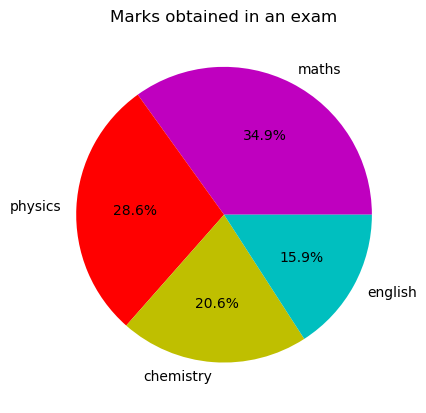

In [37]:
# The variable data_url now contains the data URL of the image
# This data URL can be used to embed the image directly in HTML or other web content
data_url

In [38]:
# Import the AzureOpenAI class from the openai library
# This class is used to interact with Azure's OpenAI Service
from openai import AzureOpenAI

Simply only run the notebook cells required for the model

Using Azure AI Studio - OpenAI Deployment

In [ ]:
# Azure AI Studio OpenAI Deployment 
# Create an instance of the AzureOpenAI client to interact with Azure's OpenAI Service
client = AzureOpenAI(
    # Use the API key for authentication
    api_key=api_key,  
    
    # Specify the API version to use
    api_version=api_version,
    
    # Construct the base URL for the deployment using the provided API base and deployment name
    base_url=f"{api_base}openai/deployments/{deployment_name}",
)

Using GitHub Model - OpenAI Deployment

In [39]:
# GitHub Model Deployment 
# Create an instance of the OpenAI client to interact with the GitHub model deployment
client = OpenAI(
    # Set the base URL for the API endpoint
    base_url=endpoint,
    
    # Use the GitHub token for authentication
    api_key=token,
)

In [40]:
# Create a chat completion request using the AzureOpenAI client
response = client.chat.completions.create(
    # Specify the model to use for generating the response
    model=model_name,
    
    # Define the messages to send to the model
    messages=[
        { 
            "role": "user", 
            "content": [  
                { 
                    # Specify the type of content as text
                    "type": "text", 
                    
                    # Provide the text content for the model to process
                    "text": "Please create Python code for image, and gen code to use plt to save the new picture under imgs/ and name it gpt-4-vision.jpg." 
                },
                { 
                    # Specify the type of content as an image URL
                    "type": "image_url",
                    
                    # Provide the image URL for the model to process
                    "image_url": {
                        "url": data_url
                    }
                }
            ] 
        } 
    ],
    
    # Set the maximum number of tokens to generate in the response
    max_tokens=2000 
)


In [41]:
# Extract the content of the first choice from the response
# The response contains multiple choices, and we are accessing the first one
result = response.choices[0].message.content

In [42]:
# The variable 'result' now contains the content of the first choice from the response
# This content is the generated text or code from the model based on the input messages
result


"Sure! Here is the Python code to create a similar pie chart using `matplotlib` and save the image under the directory `imgs/` with the name `gpt-4-vision.jpg`.\n\n```python\nimport matplotlib.pyplot as plt\n\n# Data to plot\nlabels = 'maths', 'english', 'chemistry', 'physics'\nsizes = [215, 130, 245, 210]\ncolors = ['magenta', 'cyan', 'yellow', 'red']\nexplode = (0.1, 0, 0, 0)  # explode 1st slice\n\n# Plot\nplt.figure(figsize=(6,6))  # Optional. Adjusts the figure size.\nplt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',\n        shadow=True, startangle=140)\n\nplt.title('Marks obtained in an exam')\nplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\n\n# Save the figure\noutput_directory = 'imgs/'\n# Ensure the directory exists\nimport os\nif not os.path.exists(output_directory):\n    os.makedirs(output_directory)\n\nplt.savefig(os.path.join(output_directory, 'gpt-4-vision.jpg'))\nplt.show()\n```\n\nThis script will create a 

In [43]:
# Initialize an empty string to store the extracted Python code
code = ''

# Find the starting index of the Python code block in the result
# The index is calculated by finding the position of the '```python' marker and adding 9 to it
begin = result.index('```python') + 9

# Extract the Python code from the result starting from the calculated index
code = result[begin:]


In [44]:
# Find the ending index of the Python code block in the extracted code
# The index is calculated by finding the position of the newline character followed by the closing code block marker '```'
end = code.index('\n```')

In [45]:
# Extract the Python code up to the ending index
# This removes the closing code block marker and any content after it
code = code[:end]

In [46]:
# The variable 'code' now contains the extracted Python code from the result
# This code can be executed or saved to a file for further use
code


"\nimport matplotlib.pyplot as plt\n\n# Data to plot\nlabels = 'maths', 'english', 'chemistry', 'physics'\nsizes = [215, 130, 245, 210]\ncolors = ['magenta', 'cyan', 'yellow', 'red']\nexplode = (0.1, 0, 0, 0)  # explode 1st slice\n\n# Plot\nplt.figure(figsize=(6,6))  # Optional. Adjusts the figure size.\nplt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',\n        shadow=True, startangle=140)\n\nplt.title('Marks obtained in an exam')\nplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\n\n# Save the figure\noutput_directory = 'imgs/'\n# Ensure the directory exists\nimport os\nif not os.path.exists(output_directory):\n    os.makedirs(output_directory)\n\nplt.savefig(os.path.join(output_directory, 'gpt-4-vision.jpg'))\nplt.show()"

In [47]:
# Import the subprocess module, which allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes
import subprocess


In [48]:
# Use the subprocess module to run the extracted Python code
# The 'python' command is used to execute the code
# The '-c' option allows you to pass the code as a string
# The 'capture_output' parameter is set to True to capture the output of the command
result = subprocess.run(["python", "-c", code], capture_output=True)

In [49]:
# The variable 'result' now contains the output of the subprocess command
# This includes the standard output, standard error, and the return code of the executed Python code
result


CompletedProcess(args=['python', '-c', "\nimport matplotlib.pyplot as plt\n\n# Data to plot\nlabels = 'maths', 'english', 'chemistry', 'physics'\nsizes = [215, 130, 245, 210]\ncolors = ['magenta', 'cyan', 'yellow', 'red']\nexplode = (0.1, 0, 0, 0)  # explode 1st slice\n\n# Plot\nplt.figure(figsize=(6,6))  # Optional. Adjusts the figure size.\nplt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',\n        shadow=True, startangle=140)\n\nplt.title('Marks obtained in an exam')\nplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\n\n# Save the figure\noutput_directory = 'imgs/'\n# Ensure the directory exists\nimport os\nif not os.path.exists(output_directory):\n    os.makedirs(output_directory)\n\nplt.savefig(os.path.join(output_directory, 'gpt-4-vision.jpg'))\nplt.show()"], returncode=0, stdout=b'Figure(600x600)\n', stderr=b'')

In [50]:
# Import the Image and display functions from the IPython.display module
from IPython.display import Image, display

# The Image function is used to display an image given its file path or URL
# The display function is used to display the image in the output cell of a Jupyter notebook


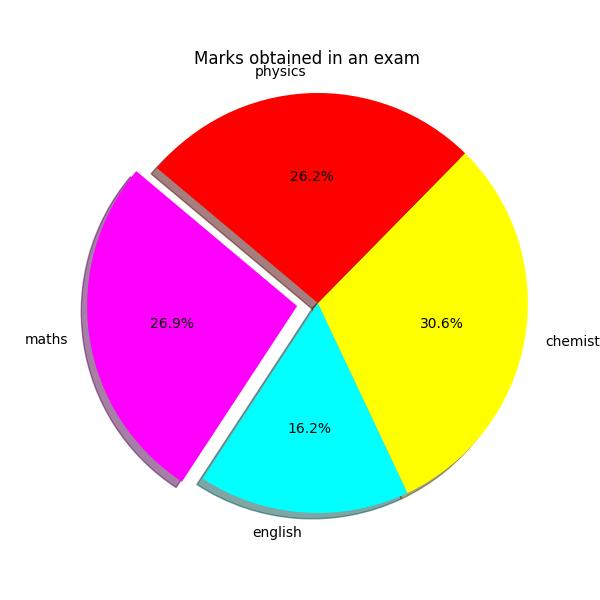

In [51]:
# The display function is used to display the output in a Jupyter notebook cell
# It takes an object as an argument and renders it
display(
    # The Image function creates an image object from a file
    # The filename parameter specifies the path to the image file
    Image(filename='./imgs/gpt-4-vision.jpg')
)